# Spatial Networks

## Introduction

This library is a short library based on [NetWorkX](https://networkx.org/) and [Shapely](https://shapely.readthedocs.io/) to experiment with Spatial Networks.

Contrary to regular networks from Graph Theory, nodes are actually localised in space. This is more suited to represent real-life networks where distance is not only affected by the distance from node to node but also by the actual distance between nodes.

<p style="background-color: red">This library is my first project for a Python library and is not perfect by any means. Functions might still change radically.</p>

## Nodes and Edges

To create a Spatial Graph, we need to give nodes a localization in space. To simplify the use of this nodes, I have created a class called `SpatialNode`:

In [1]:
from shapely.geometry import Point
from spatial_networks.utils import SpatialNode

my_node_position = Point(0, 0)
my_second_node_position = Point(1, 1)

my_node = SpatialNode(
    name="my_node",
    geometry=my_node_position,
    **{"some_key": "some_value", "another_key": "another_value"}
)

my_second_node = SpatialNode(
    name="my_second_node",
    geometry=my_second_node_position
)


This class is not really necessary: you could use the following dictionary to achieve the same result for `my_node`:

```python
my_node = {
    "name": "my_node",
    "geometry": my_node_position,
    "some_key": "some_value", 
    "another_key": "another_value"
}
```

On the other hand, edges can be defined with the `SpatialEdge` class. Here we are going to define an edge between `my_node` and `my_seconde_node`:

In [2]:
from shapely.geometry import LineString
from spatial_networks.utils import SpatialEdge

my_edge_geometry = LineString([my_node_position, my_second_node_position])

my_edge = SpatialEdge(
    start="my_node",
    end="my_second_node",
    geometry=my_edge_geometry
)

This edge could also be defined with a dictionary:
    
```python
my_edge = {
    "start": "my_node",
    "end": "my_second_node",
    "geometry": my_edge_geometry
}
```

And we could add some other features by using other keys.

The mandatory arguments are:

- `name` and `geometry` for `SpatialNode`
- `start`, `end` and `geometry` for `SpatialEdge`

Note that `start` and `end` should refer to existing nodes in your graph.

## Spatial Graphs

The main class of the library is the `SpatialGraph` class. You can find the same methods as in NetworkX `Graph` class. You can use the constructor to pass `nodes` and `edges` which should be a list of `SpatialNode` (or equivalent dictionaries) and a list of `SpatialEdge` (or equivalent dictionaries). You can also chose to add nodes and edges later by using `add_edge`, `add_edges_from`, `add_node` or `add_nodes_from`.

The three following codes are equivalent:

In [3]:
from spatial_networks import SpatialGraph

# 1st
my_first_graph = SpatialGraph(
    nodes=[my_node, my_second_node],
    edges=[my_edge]
)

# 2nd
my_first_graph = SpatialGraph()

my_first_graph.add_node(my_node)
my_first_graph.add_node(my_second_node)

my_first_graph.add_edge(my_edge)

# 3rd

my_first_graph = SpatialGraph()

my_first_graph.add_nodes_from([my_node, my_second_node])
my_first_graph.add_edges_from([my_edge])

# adding a third node

my_first_graph.add_node({"name": "my_third_node", "geometry": Point(0, 1)})

## Visual representation

In order to visualize Spatial Graphs, I have overridden the `draw`, `draw_edges` and `draw_nodes` methods. Moreover, I have try to default it to something more visually interesting than default NetowrkX drawing functions.

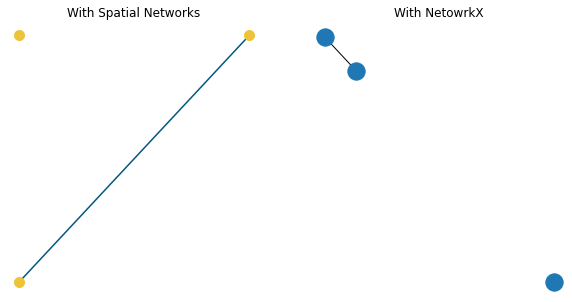

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

my_first_graph.draw(ax=axes[0])
axes[0].axis("off")
axes[0].set_title("With Spatial Networks")

nx.draw(my_first_graph, ax=axes[1])
axes[1].set_title("With NetowrkX")

plt.show()

Note that the geometry of the edges might have some importance. For example, we can define the following graph:

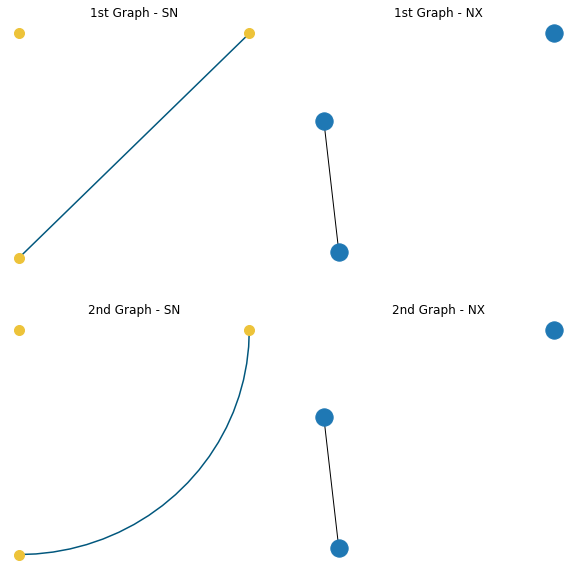

In [5]:
from spatial_networks.utils import create_circle_arc

my_second_edge = SpatialEdge(
    start=my_node["name"],
    end=my_second_node["name"],
    geometry=create_circle_arc(
        start=my_node["geometry"],
        end=my_second_node["geometry"],
        center=Point(0, 1),
        nb_points=20
    )
)

my_second_graph = SpatialGraph(
    nodes=[my_node, my_second_node, {"name": "my_third_node", "geometry": Point(0, 1)}],
    edges=[my_second_edge]
)



fig, axes = plt.subplots(2, 2, figsize=(10, 10))

my_first_graph.draw(ax=axes[0, 0])
my_second_graph.draw(ax=axes[1, 0])

spring_layout = nx.spring_layout(my_first_graph)


nx.draw(my_first_graph, pos=spring_layout, ax=axes[0, 1])
nx.draw(my_second_graph, pos=spring_layout, ax=axes[1, 1])


axes[0, 0].axis("off")
axes[0, 1].axis("off")
axes[1, 0].axis("off")
axes[1, 1].axis("off")

axes[0, 0].set_title("1st Graph - SN")
axes[1, 0].set_title("2nd Graph - SN")

axes[0, 1].set_title("1st Graph - NX")
axes[1, 1].set_title("2nd Graph - NX")

plt.show()


## Sub Classes

In order to showcase some uses of the code, I have defined some sub classes that inherit from the `SpatialGraph` class. We are going to review them:

### Random Spatial Graph

This class is inspired from the usual Random Graph object which is used in Graph Theory usually: we generate some nodes. Edges are created between nodes based on a random variable. Here we simply provide nodes with a random position:


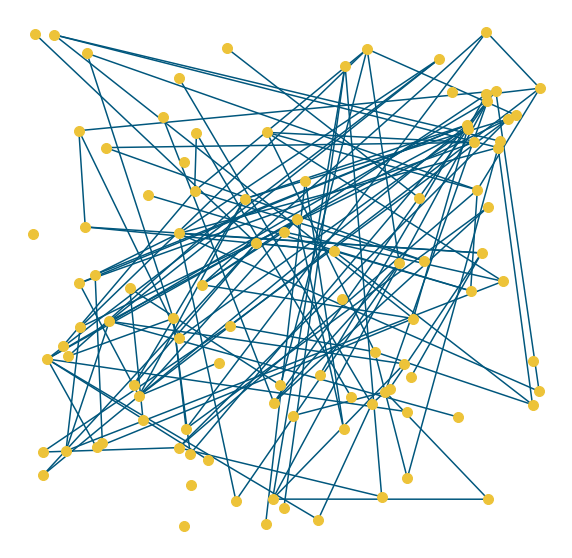

In [6]:
from spatial_networks import RandomSpatialGraph

my_random_spatial_graph = RandomSpatialGraph(number_of_nodes=100, edge_probability=.02)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_random_spatial_graph.draw(ax=ax)

plt.axis("off")

plt.show()

You can choose the position distribution function by picking another `numpy.random` distribution:

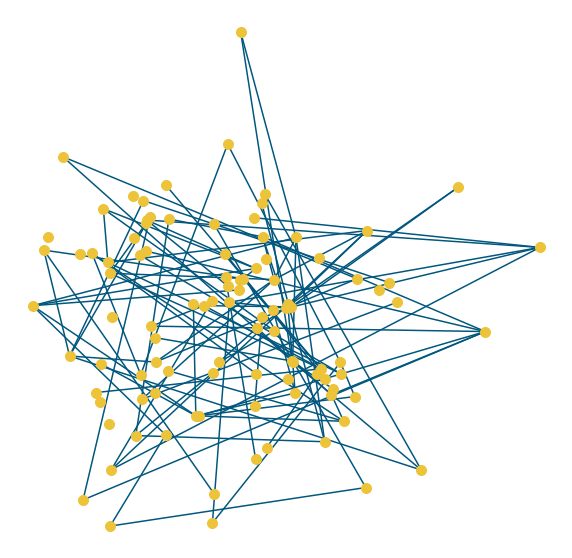

In [7]:
import numpy as np

my_random_spatial_graph2 = RandomSpatialGraph(
    number_of_nodes=100,
    edge_probability=.02,
    position_distribution=np.random.normal
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_random_spatial_graph2.draw(ax=ax)

plt.axis("off")

plt.show()

This class is not very interesting except for tests. 

## Random Geometric Graphs

`RandomSpatialGraph` is a name I gave this class but which should be mixed with `RandomGeometricGraphs`. Random Geometric Graphs (or RGG) are usually are more common in spatial networks. They are defined by picking nodes at random positions. Then, we define a radius $r$ and if the distance between two nodes is less than $2 \times r$, we create an edge between nodes (you can think that the nodes have a bubble around them and if this bubble intersects another bubble, then the nodes are linked).


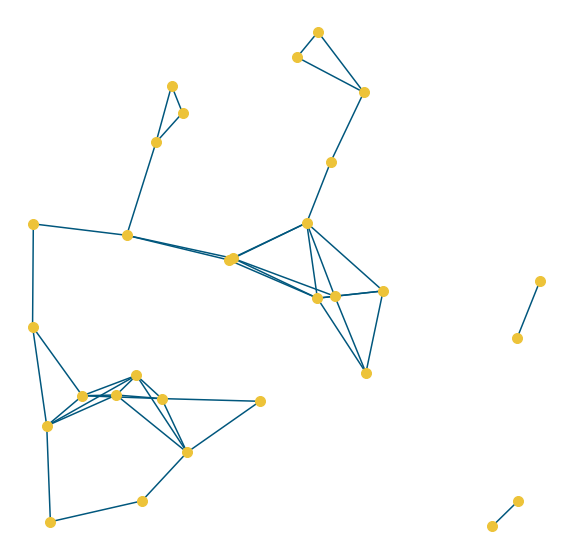

In [8]:
from spatial_networks import RandomGeometricGraph


my_random_geographic_graph = RandomGeometricGraph(number_of_nodes=30, radius=.1)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_random_geographic_graph.draw(ax=ax)

plt.axis("off")

plt.show()

### Soft Random Geometric Graphs

`SoftRGG` are a wider class of Random Graph. The probability of linking two nodes is defined as a function of length called the deterrence function: 

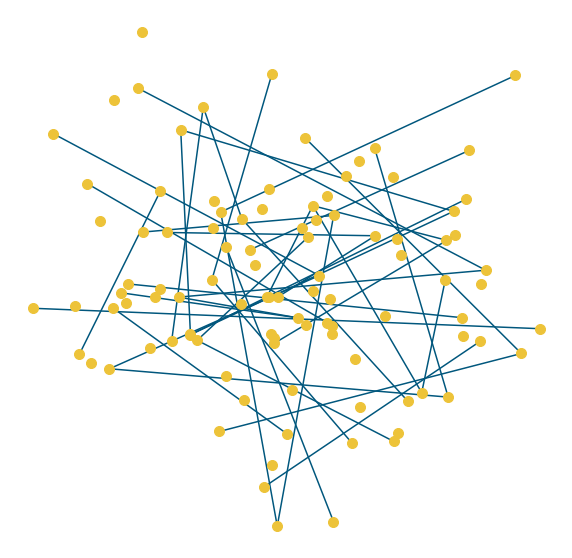

In [9]:
from spatial_networks import SoftRGG

def my_deterrence_function(distance):
    return np.random.uniform() < distance / 200

my_soft_rgg = SoftRGG(
    number_of_nodes=100,
    deterrence_function=my_deterrence_function,
    position_distribution=np.random.normal
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_soft_rgg.draw(ax=ax)

plt.axis("off")


plt.show()

## Star Network

The two following classes are toy examples for studying spatial graphs. We build regular star networks by providing a depth and a number of branches in the star:

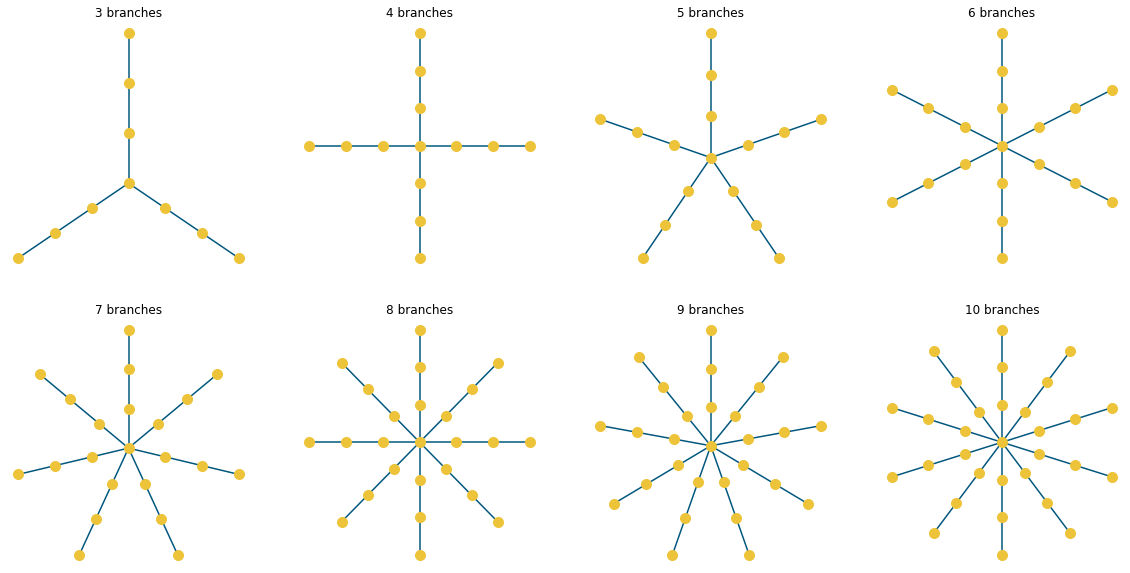

In [10]:
from spatial_networks import StarSpatialGraph

star_networks = []

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for n in range(3, 11):
    i = (n - 3) // 4
    j = (n - 3) % 4
    
    my_star_network = StarSpatialGraph(number_of_branches=n, nodes_per_branch=4)
    
    my_star_network.draw(ax=axes[i, j])
    axes[i, j].set_title(f"{n} branches")
    axes[i, j].axis("off")
    
    star_networks.append(my_star_network)
plt.show()
    
    

### Star and Ring Netowks

The principle of the Star and Ring Network is not add links at a given depth in a star network:

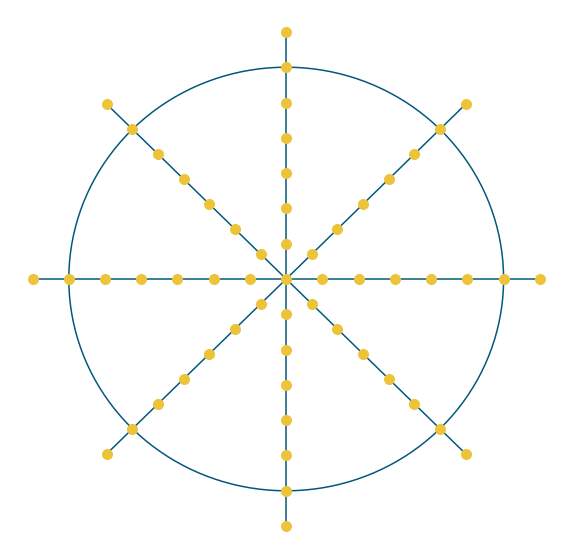

In [11]:
from spatial_networks import StarAndRingNetwork

my_star_network_with_ring = StarAndRingNetwork(number_of_branches=8, nodes_per_branch=8, ring_depths=[6])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_star_network_with_ring.draw(ax=ax)

plt.axis("off")


plt.show()

For some reason, I added the possibility for several rings (probably useless but pretty):

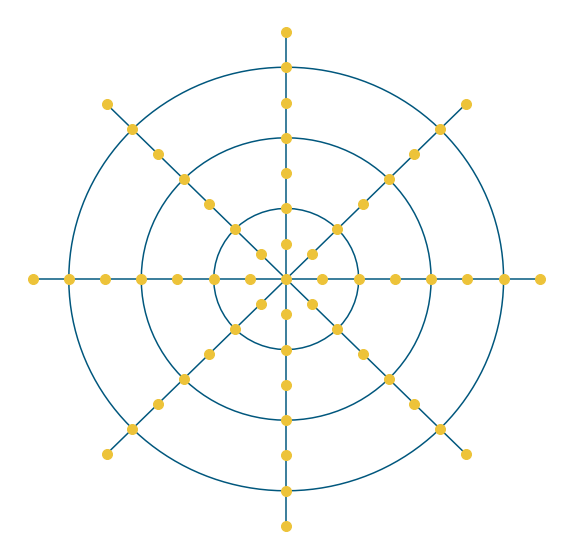

In [12]:
from spatial_networks import StarAndRingNetwork

my_star_network_with_rings = StarAndRingNetwork(number_of_branches=8, nodes_per_branch=8, ring_depths=[2, 4, 6])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_star_network_with_rings.draw(ax=ax)

plt.axis("off")


plt.show()

## Shortest path, Metric distance and Detour index

In Spatial Networks, a good caracterization of a graph can be made by using the detour index:

$$\eta(i, j) = \frac{d_R(i, j)}{d_E(i, j)}$$

where

* $d_E(i, j)$ is the Euclidean distance between nodes i and j
* $d_R(i, j)$ is the cumulative distance on the shortest pass between i and j


Let's consider the two following networks:

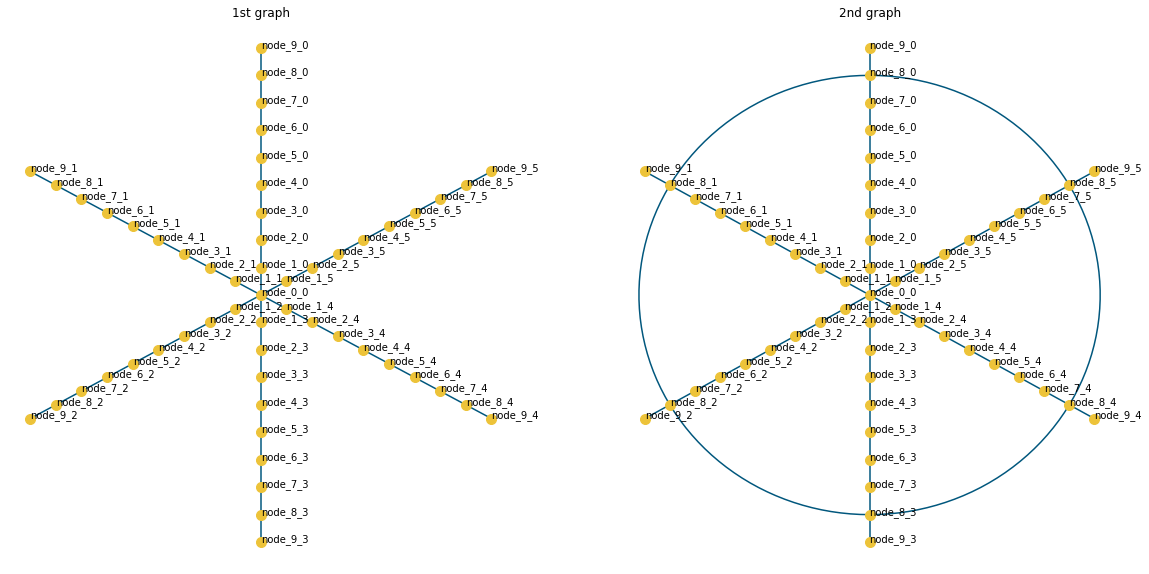

In [13]:
nb_branches = 6
nodes_per_branch = 10

graph1 = StarSpatialGraph(
    number_of_branches=nb_branches,
    nodes_per_branch=nodes_per_branch
)
graph2 = StarAndRingNetwork(
    number_of_branches=nb_branches,
    nodes_per_branch=nodes_per_branch,
    ring_depths=[8]
)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

graph1.draw(include_names=True, ax=axes[0])
graph2.draw(include_names=True, ax=axes[1])

axes[0].set_title("1st graph")
axes[1].set_title("2nd graph")

axes[0].axis("off")
axes[1].axis("off")

plt.show()


In [23]:
node_i = "node_9_0"
node_j = "node_8_1"

metric_distance_1 = graph1.metric_distance(node_i, node_j)
metric_distance_2 = graph2.metric_distance(node_i, node_j)

route_distance_1 = graph1.route_distance(node_i, node_j)
route_distance_2 = graph2.route_distance(node_i, node_j)

print(
f"""Graph 1:
Metric distance between '{node_i}' and '{node_j}': {round(metric_distance_1, 2)}
Route distance between '{node_i}' and '{node_j}': {round(route_distance_1, 2)}
Detour index: {round(route_distance_1 / metric_distance_1, 2)}

Graph 2:
Metric distance between '{node_i}' and '{node_j}': {round(metric_distance_2, 2)}
Route distance between '{node_i}' and '{node_j}': {round(route_distance_2, 2)}
Detour index: {round(route_distance_2 / metric_distance_2, 2)}
"""
)


Graph 1:
Metric distance between 'node_9_0' and 'node_8_1': 8.54
Route distance between 'node_9_0' and 'node_8_1': 17.0
Detour index: 1.99

Graph 2:
Metric distance between 'node_9_0' and 'node_8_1': 8.54
Route distance between 'node_9_0' and 'node_8_1': 9.38
Detour index: 1.1



The accessibility of a node is defined by the average detour index of a node:

$$\eta(i) = \frac{1}{N-1}\sum_{j}\eta(i, j)$$

In [27]:
node_i = "node_9_0"

detour_index_1 = []

for node_j in graph1:
    if node_j != node_i:
        detour_index_1.append(graph1.detour_index(node_i, node_j))

accessibility1 = np.mean(detour_index_1)        

detour_index_2 = []

for node_j in graph2:
    if node_j != node_i:
        detour_index_2.append(graph2.detour_index(node_i, node_j))

accessibility2 = np.mean(detour_index_2)

print(
f"""Graph 1:
Accessibility of node '{node_i}': {round(accessibility1, 2)}

Graph 2:
Accessibility of node '{node_i}': {round(accessibility2, 2)}
"""
)



Graph 1:
Accessibility of node 'node_9_0': 1.28

Graph 2:
Accessibility of node 'node_9_0': 1.16

